<a href="https://colab.research.google.com/github/greymattar/ECG_WGAN_AugmentationClassification/blob/main/results_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

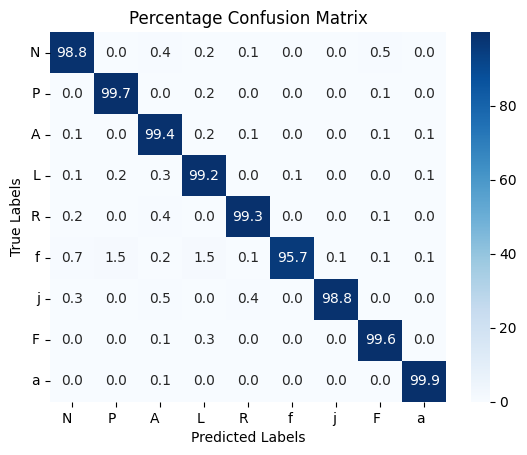

Overall Specificity: 0.9986631016042781
Average Sensitivity: 0.9893
Overall Accuracy: 0.9893
Average Precision: 0.9894
Average F1 Score: 0.9893


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix and class labels
confusion_matrix = np.array([[986, 0, 4, 2, 1, 0, 0, 5, 0],
                             [0, 994, 0, 2, 0, 0, 0, 1, 0],
                             [1, 0, 993, 2, 1, 0, 0, 1, 1],
                             [1, 2, 3, 991, 0, 1, 0, 0, 1],
                             [2, 0, 4, 0, 990, 0, 0, 1, 0],
                             [7, 15, 2, 15, 1, 953, 1, 1, 1],
                             [3, 0, 5, 0, 4, 0, 984, 0, 0],
                             [0, 0, 1, 3, 0, 0, 0, 993, 0],
                             [0, 0, 1, 0, 0, 0, 0, 0, 996]])

class_labels = ['N', 'P', 'A', 'L', 'R', 'f', 'j', 'F', 'a']

# Compute the sum of each row (total true positives for each class)
row_sums = confusion_matrix.sum(axis=1)

# Divide each element of the confusion matrix by the corresponding row's sum to get the percentage values
percentage_matrix = (confusion_matrix.T / row_sums).T * 100

# Create a heatmap to visualize the percentage confusion matrix
sns.heatmap(percentage_matrix, annot=True, fmt=".1f", cmap='Blues')

# Set the class labels as the tick labels
tick_labels = ['{} ({:.1f}%)'.format(class_labels[i], row_sums[i] / confusion_matrix.sum() * 100) for i in range(len(class_labels))]
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0, ha='right')
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Percentage Confusion Matrix")

plt.show()

# Calculate TN and FP for each class
TN = np.sum(confusion_matrix) - np.sum(confusion_matrix, axis=0) - np.sum(confusion_matrix, axis=1) + np.diag(confusion_matrix)
FP = np.sum(confusion_matrix, axis=0) - np.diag(confusion_matrix)

# Calculate overall specificity
overall_specificity = np.sum(TN) / (np.sum(TN) + np.sum(FP))

print("Overall Specificity:", overall_specificity)


# Calculate TP and FN for each class
TP = np.diag(confusion_matrix)
FN = np.sum(confusion_matrix, axis=1) - TP

# Calculate sensitivity (recall) for each class
sensitivity = TP / (TP + FN)

# Calculate average sensitivity across all classes
average_sensitivity = np.mean(sensitivity)

# Print sensitivity values
#for class_idx, sens in enumerate(sensitivity):
    #print("Sensitivity (Class {}): {:.4f}".format(class_idx, sens))

print("Average Sensitivity: {:.4f}".format(average_sensitivity))

correct_predictions = np.sum(np.diag(confusion_matrix))

# Calculate the total number of instances
total_instances = np.sum(confusion_matrix)

# Calculate the overall accuracy
overall_accuracy = correct_predictions / total_instances

print("Overall Accuracy: {:.4f}".format(overall_accuracy))

# Calculate precision (positive predictive value) for each class
precision = TP / (TP + FP)

# Calculate average precision across all classes
average_precision = np.mean(precision)

# Print precision values
#for class_idx, prec in enumerate(precision):
    #print("Precision (Class {}): {:.4f}".format(class_idx, prec))

print("Average Precision: {:.4f}".format(average_precision))
# Calculate F1 score for each class
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate average F1 score across all classes
average_f1_score = np.mean(f1_score)

# Print F1 score values
#for class_idx, f1 in enumerate(f1_score):
    #print("F1 Score (Class {}): {:.4f}".format(class_idx, f1))

print("Average F1 Score: {:.4f}".format(average_f1_score))


Now for imbalanced dataset


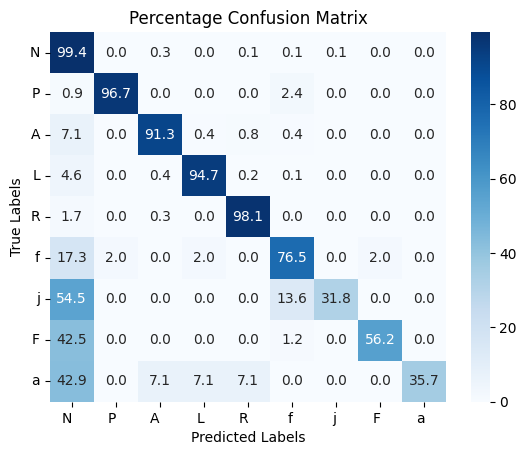

Overall Specificity: 0.9972282182103611
Average Sensitivity: 0.7562
Overall Accuracy: 0.9778
Average Precision: 0.9031
Average F1 Score: 0.8019


In [ ]:
confusion_matrix = np.array([[7451, 0, 20, 2, 8, 6, 4, 2, 0],
                             [6, 678, 0, 0, 0, 17, 0, 0, 0],
                             [18, 0, 232, 1, 2, 1, 0, 0, 0],
                             [37, 0, 3, 762, 2, 1, 0, 0, 0],
                             [12, 0, 2, 0, 711, 0, 0, 0, 0],
                             [17, 2, 0, 2, 0, 75, 0, 2, 0],
                             [12, 0, 0, 0, 0, 3, 7, 0, 0],
                             [34, 0, 0, 0, 0, 1, 0, 45, 0],
                             [6, 0, 1, 1, 1, 0, 0, 0, 5]])

class_labels = ['N', 'P', 'A', 'L', 'R', 'f', 'j', 'F', 'a']

# Compute the sum of each row (total true positives for each class)
row_sums = confusion_matrix.sum(axis=1)

# Divide each element of the confusion matrix by the corresponding row's sum to get the percentage values
percentage_matrix = (confusion_matrix.T / row_sums).T * 100

# Create a heatmap to visualize the percentage confusion matrix
sns.heatmap(percentage_matrix, annot=True, fmt=".1f", cmap='Blues')

# Set the class labels as the tick labels
tick_labels = ['{} ({:.1f}%)'.format(class_labels[i], row_sums[i] / confusion_matrix.sum() * 100) for i in range(len(class_labels))]
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0, ha='right')
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Percentage Confusion Matrix")

plt.show()

# Calculate TN and FP for each class
TN = np.sum(confusion_matrix) - np.sum(confusion_matrix, axis=0) - np.sum(confusion_matrix, axis=1) + np.diag(confusion_matrix)
FP = np.sum(confusion_matrix, axis=0) - np.diag(confusion_matrix)

# Calculate overall specificity
overall_specificity = np.sum(TN) / (np.sum(TN) + np.sum(FP))

print("Overall Specificity:", overall_specificity)


# Calculate TP and FN for each class
TP = np.diag(confusion_matrix)
FN = np.sum(confusion_matrix, axis=1) - TP

# Calculate sensitivity (recall) for each class
sensitivity = TP / (TP + FN)

# Calculate average sensitivity across all classes
average_sensitivity = np.mean(sensitivity)

# Print sensitivity values
#for class_idx, sens in enumerate(sensitivity):
    #print("Sensitivity (Class {}): {:.4f}".format(class_idx, sens))

print("Average Sensitivity: {:.4f}".format(average_sensitivity))

correct_predictions = np.sum(np.diag(confusion_matrix))

# Calculate the total number of instances
total_instances = np.sum(confusion_matrix)

# Calculate the overall accuracy
overall_accuracy = correct_predictions / total_instances

print("Overall Accuracy: {:.4f}".format(overall_accuracy))

# Calculate precision (positive predictive value) for each class
precision = TP / (TP + FP)

# Calculate average precision across all classes
average_precision = np.mean(precision)

# Print precision values
#for class_idx, prec in enumerate(precision):
    #print("Precision (Class {}): {:.4f}".format(class_idx, prec))

print("Average Precision: {:.4f}".format(average_precision))

# Calculate F1 score for each class
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate average F1 score across all classes
average_f1_score = np.mean(f1_score)

# Print F1 score values
#for class_idx, f1 in enumerate(f1_score):
    #print("F1 Score (Class {}): {:.4f}".format(class_idx, f1))

print("Average F1 Score: {:.4f}".format(average_f1_score))



now for 50% augmented data

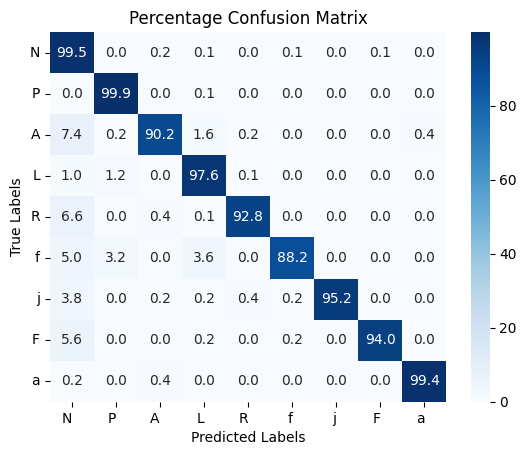

Overall Specificity: 0.997068980218281
Average Sensitivity: 0.9519
Overall Accuracy: 0.9766
Average Precision: 0.9782
Average F1 Score: 0.9643


In [ ]:
confusion_matrix = np.array([[6961, 1, 15, 6, 3, 4, 1, 5, 3],
                             [0, 701, 0, 1, 0, 0, 0, 0, 0],
                             [37, 1, 450, 8, 1, 0, 0, 0, 2],
                             [8, 10, 0, 788, 1, 0, 0, 0, 0],
                             [48, 0, 3, 1, 673, 0, 0, 0, 0],
                             [25, 16, 0, 18, 0, 440, 0, 0, 0],
                             [19, 0, 1, 1, 2, 1, 475, 0, 0],
                             [28, 0, 0, 1, 0, 1, 0, 469, 0],
                             [1, 0, 2, 0, 0, 0, 0, 0, 496]])

class_labels = ['N', 'P', 'A', 'L', 'R', 'f', 'j', 'F', 'a']

# Compute the sum of each row (total true positives for each class)
row_sums = confusion_matrix.sum(axis=1)

# Divide each element of the confusion matrix by the corresponding row's sum to get the percentage values
percentage_matrix = (confusion_matrix.T / row_sums).T * 100

# Create a heatmap to visualize the percentage confusion matrix
sns.heatmap(percentage_matrix, annot=True, fmt=".1f", cmap='Blues')

# Set the class labels as the tick labels
tick_labels = ['{} ({:.1f}%)'.format(class_labels[i], row_sums[i] / confusion_matrix.sum() * 100) for i in range(len(class_labels))]
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0, ha='right')
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Percentage Confusion Matrix")

plt.show()

# Calculate TN and FP for each class
TN = np.sum(confusion_matrix) - np.sum(confusion_matrix, axis=0) - np.sum(confusion_matrix, axis=1) + np.diag(confusion_matrix)
FP = np.sum(confusion_matrix, axis=0) - np.diag(confusion_matrix)

# Calculate overall specificity
overall_specificity = np.sum(TN) / (np.sum(TN) + np.sum(FP))

print("Overall Specificity:", overall_specificity)


# Calculate TP and FN for each class
TP = np.diag(confusion_matrix)
FN = np.sum(confusion_matrix, axis=1) - TP

# Calculate sensitivity (recall) for each class
sensitivity = TP / (TP + FN)

# Calculate average sensitivity across all classes
average_sensitivity = np.mean(sensitivity)

# Print sensitivity values
#for class_idx, sens in enumerate(sensitivity):
    #print("Sensitivity (Class {}): {:.4f}".format(class_idx, sens))

print("Average Sensitivity: {:.4f}".format(average_sensitivity))

correct_predictions = np.sum(np.diag(confusion_matrix))

# Calculate the total number of instances
total_instances = np.sum(confusion_matrix)

# Calculate the overall accuracy
overall_accuracy = correct_predictions / total_instances

print("Overall Accuracy: {:.4f}".format(overall_accuracy))

# Calculate precision (positive predictive value) for each class
precision = TP / (TP + FP)

# Calculate average precision across all classes
average_precision = np.mean(precision)

# Print precision values
#for class_idx, prec in enumerate(precision):
    #print("Precision (Class {}): {:.4f}".format(class_idx, prec))

print("Average Precision: {:.4f}".format(average_precision))

# Calculate F1 score for each class
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate average F1 score across all classes
average_f1_score = np.mean(f1_score)

# Print F1 score values
#for class_idx, f1 in enumerate(f1_score):
    #print("F1 Score (Class {}): {:.4f}".format(class_idx, f1))

print("Average F1 Score: {:.4f}".format(average_f1_score))


now precision recall f1 score graph

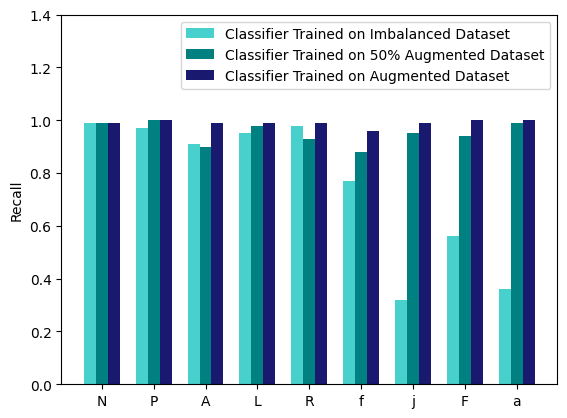

In [ ]:
import matplotlib.pyplot as plt

# Recall values for the classifiers
recall_1 = [0.99, 0.97, 0.91, 0.95, 0.98, 0.77, 0.32, 0.56, 0.36]
recall_2 = [0.99, 1.00, 0.90, 0.98, 0.93, 0.88, 0.95, 0.94, 0.99]
recall_3 = [0.99, 1.00, 0.99, 0.99, 0.99, 0.96, 0.99, 1.00, 1.00]

# Classes
classes = ['N', 'P', 'A', 'L', 'R', 'f', 'j', 'F', 'a']

# Set the positions and width for the bars
positions = range(len(classes))
width = 0.23

# Plot the bars
plt.bar(positions, recall_1, width, label='Classifier Trained on Imbalanced Dataset', color='mediumturquoise')
plt.bar([p + width for p in positions], recall_2, width, label='Classifier Trained on 50% Augmented Dataset', color='teal')
plt.bar([p + 2 * width for p in positions], recall_3, width, label='Classifier Trained on Augmented Dataset', color='midnightblue')

# Add labels, title, and legend
plt.ylim(0, 1.4)
#plt.xlabel('Classes')
plt.ylabel('Recall')
#plt.title('Recall Values for Classifiers')
plt.xticks([p + width for p in positions], classes)
plt.legend()

# Show the plot
plt.show()


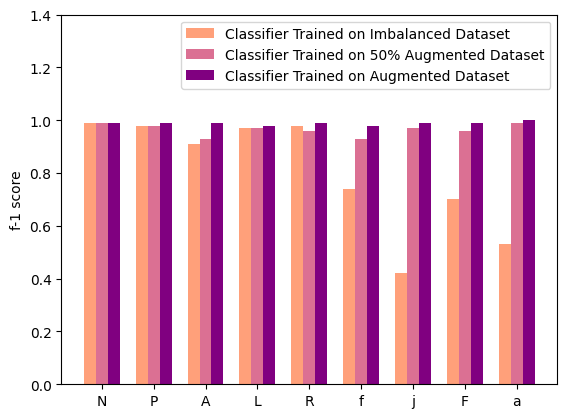

In [ ]:
# Recall values for Classifier 1
fscore_1 = [0.99, 0.98, 0.91, 0.97, 0.98, 0.74, 0.42, 0.70, 0.53]


# Recall values for Classifier 1
fscore_2 = [0.99, 0.98, 0.93, 0.97, 0.96, 0.93, 0.97, 0.96, 0.99]

# Recall values for Classifier 2
fscore_3 = [0.99, 0.99 , 0.99, 0.98, 0.99, 0.98,0.99, 0.99 , 1.00]

# Classes
classes = ['N', 'P', 'A', 'L', 'R', 'f', 'j', 'F', 'a']

# Set the positions and width for the bars
positions = range(len(classes))
width = 0.23

# Plot the bars
plt.bar(positions, fscore_1, width, label='Classifier Trained on Imbalanced Dataset', color='lightsalmon')
plt.bar([p + width for p in positions], fscore_2, width, label='Classifier Trained on 50% Augmented Dataset', color='palevioletred')
plt.bar([p + 2 * width for p in positions], fscore_3, width, label='Classifier Trained on Augmented Dataset', color='purple')

# Add labels, title, and legend
plt.ylim(0, 1.4)
#plt.xlabel('Classes')
plt.ylabel('f-1 score')
#plt.title('Recall Values for Classifiers')
plt.xticks([p + width for p in positions], classes)
plt.legend()

# Show the plot
plt.show()


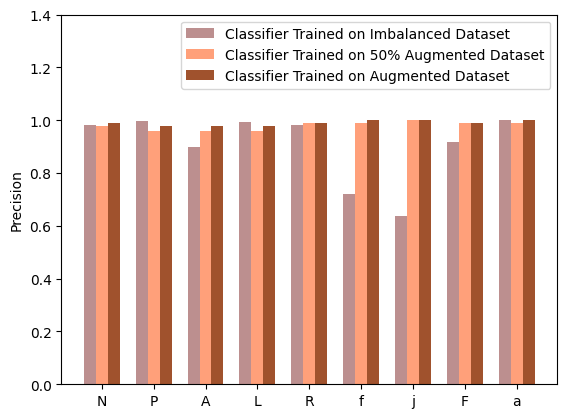

In [ ]:
# Recall values for Classifier 1
pre_1 = [0.9812985644672725,0.9970588235294118,0.8992248062015504,0.9921875,0.9820441988950276,0.7211538461538461,0.6363636363636364,0.9183673469387755,1.0]


# Recall values for Classifier 1
pre_2 = [0.98, 0.96, 0.96, 0.96, 0.99, 0.99, 1.00, 0.99, 0.99]

# Recall values for Classifier 2
pre_3 = [ 0.99 , 0.98, 0.98, 0.98, 0.99 , 1.00 ,1.00, 0.99, 1.00]

# Classes
classes = ['N', 'P', 'A', 'L', 'R', 'f', 'j', 'F', 'a']

# Set the positions and width for the bars
positions = range(len(classes))
width = 0.23

# Plot the bars
plt.bar(positions, pre_1, width, label='Classifier Trained on Imbalanced Dataset', color='rosybrown')
plt.bar([p + width for p in positions], pre_2, width, label='Classifier Trained on 50% Augmented Dataset', color='lightsalmon')
plt.bar([p + 2 * width for p in positions], pre_3, width, label='Classifier Trained on Augmented Dataset', color='sienna')

# Add labels, title, and legend
plt.ylim(0, 1.4)
#plt.xlabel('Classes')
plt.ylabel('Precision')
#plt.title('Recall Values for Classifiers')
plt.xticks([p + width for p in positions], classes)
plt.legend()

# Show the plot
plt.show()

pie chart

In [ ]:
import plotly.graph_objects as go

data = {
    'N': 75052, 'L': 8075, 'R': 7259, 'V': 7130,
    'P': 7028, 'A': 2546, 'f': 982, 'F': 803,
    'j': 229, 'a': 150, 'E': 106, 'J': 83,
    'Q': 33, 'e': 16, 'S': 2
}

labels = []
values = []
for item in data:
    labels.append(item)
    values.append(data[item])

textinfo = 'none' # Show percentage and label for the top 5 slices

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo=textinfo)])
fig.show()


In [ ]:
import plotly.graph_objects as go


data = {
    'N:Normal': 75052, 'L:Left bundle branch block': 8075, 'R:Right bundle branch block': 7259, 'V:Premature Ventricular Contraction': 7130,
    'P:Paced': 7028, 'A:Atrial Premature contraction': 2546, 'f:Fusion of paced and normal': 982, 'F:Fusion of Ventricular and Normal': 803,
    'j:Nodal (junctional) escape': 229, 'a:Aberrated Atrial Premature': 150, 'E:Ventricular Escape': 106, 'J:Nodal (junctional) Premature': 83,
    'Q:Unclassifiable beat': 33, 'e: Atrial escape': 16, 'S:Premature or ectopic supraventricular': 2
}

labels = []
values = []
for item in data:
    labels.append(item)
    values.append(data[item])

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='none')])

# Set the position of the legend
fig.update_layout(legend=dict(x=0.92, y=0.1))

fig.show()


In [ ]:
 pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00


In [ ]:
fig.write_image("pie_chart.png")

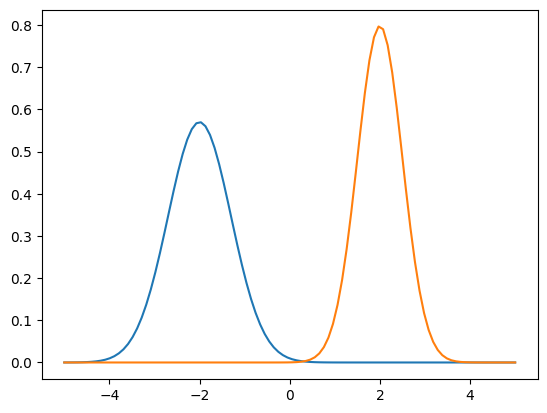

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the first Gaussian distribution
mean_1 = -2  # Mean
std_1 = 0.7   # Standard deviation

# Parameters for the second Gaussian distribution
mean_2 = 2  # Mean
std_2 = 0.5   # Standard deviation

# Generate x-axis values
x = np.linspace(-5, 5, 100)

# Calculate probability density function (PDF) values for the first Gaussian distribution
pdf_1 = (1 / (std_1 * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_1)**2 / (2 * std_1**2))

# Calculate probability density function (PDF) values for the second Gaussian distribution
pdf_2 = (1 / (std_2 * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_2)**2 / (2 * std_2**2))

# Plot the Gaussian distribution curves
plt.plot(x, pdf_1, label='Pg')
plt.plot(x, pdf_2, label='Pr')

# Add labels and title
#plt.xlabel('X-axis')
#plt.ylabel('Probability Density')
#plt.title('Gaussian Distribution Curves')

# Add legend
#plt.legend()

# Show the plot
plt.show()
